In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
from importlib import reload
import shlex
import medvqa
from medvqa.train_vqa import debug_main

In [3]:
reload(medvqa.datasets.vqa)
reload(medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management)
reload(medvqa.datasets.iuxray.iuxray_vqa_dataset_management)
reload(medvqa.datasets.chexpert.chexpert_dataset_management)
reload(medvqa.train_vqa)

In [3]:
output = debug_main(args=shlex.split(
    ' '.join([
        '--epochs 120',
        '--batches-per-epoch 300',
        '--batch-size 80',
        '--num-workers 5',
        '--optimizer-name "adamw"',
        '--scheduler "warmup+decay"',
        '--lr 1e-6',
        '--warmup-and-decay-args "1e-6,8,4e-4,110,5e-6"',
        '--iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json"',
        '--mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json"',
        '--classify-orientation',
        '--classify-chexpert',
        '--iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl"',
        '--mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl"',
        '--classify-questions',
        '--n-questions 97',
        '--iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl"',
        '--mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl"',
        '--balanced-split',
        '--iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl"',
        '--mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl"',
        '--balanced-dataloading',
        '--medical-tokenization',
        '--medical-terms-frequency-filename "medical_terms_frequency__20220629_052724.pkl"',
        '--question-encoding "one-hot"',
        '--answer-decoding "transformer"',
        '--binary-loss-name "wbce-c"',
        '--img-aug-mode "random-color-and-spatial"',
        '--chexpert-mode "vqa"',
        '--mimiccxr-include-chexpert-mode',
        '--iuxray-include-chexpert-mode',
        '--visual-input-mode "hybrid"',
        '--visual-features-mlp-in-dim 753',
        '--visual-features-mlp-out-dim 512',
        '--visual-features-mlp-hidden-dims 512',
        '--iuxray-precomputed-visual-features-path "/mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl"',
        '--mimiccxr-precomputed-visual-features-path "/mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl"',
        '--chexpert-precomputed-visual-features-path "/mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl"',
        '--no-save',
    ])
))

script's arguments:
   epochs: 120
   batches_per_epoch: 300
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: hybrid
   raw_image_encoding: cnn
   image_local_feat_size: 1024
   densenet_pretrained_weights_path: 
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: 753
   visual_features_mlp_out_dim: 512
   visual_features_mlp_hidden_dims: [512]
   iuxray_precomputed_visual_features_path: /mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl
   mimiccxr_precomputed_visual_features_path: /mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl
   chexpert_precomputed_visual_features_path: /mnt/workspace/che

Loading images
Loading orientations
Loading genders
Loading chexpert labels
Loading precomputed visual features from /mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl ...
features.shape = (223648, 753), len(image_paths) = 223648
  done!
label = 1, len(pos_indices)=23309, len(neg_indices)=200321
label = 2, len(pos_indices)=35151, len(neg_indices)=188479
label = 3, len(pos_indices)=10675, len(neg_indices)=212955
label = 4, len(pos_indices)=111301, len(neg_indices)=112329
label = 5, len(pos_indices)=65274, len(neg_indices)=158356
label = 6, len(pos_indices)=42556, len(neg_indices)=181074
label = 7, len(pos_indices)=24815, len(neg_indices)=198815
label = 8, len(pos_indices)=67191, len(neg_indices)=156439
label = 9, len(pos_indices)=22601, len(neg_indices)=201029
label = 10, len(pos_indices)=97875, len(neg_indices)=125755
label = 11, len(pos_indices)=6174, len(neg_indices)=217456
label = 12, len(pos_indices)=9680, len(neg_indices)=213950
label = 13, len(pos_indices)=117184,

In [4]:
output.keys()

dict_keys(['mimiccxr_vqa_trainer', 'iuxray_vqa_trainer', 'chexpert_vqa_trainer'])

In [6]:
!python ../train_vqa.py \
        --epochs 120 \
        --batches-per-epoch 350 \
        --batch-size 90 \
        --num-workers 7 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,8,4e-4,112,5e-6" \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json" \
        --classify-orientation \
        --classify-chexpert \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl" \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl" \
        --classify-questions \
        --n-questions 97 \
        --iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl" \
        --mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl" \
        --balanced-split \
        --iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl" \
        --mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl" \
        --balanced-dataloading \
        --medical-tokenization \
        --medical-terms-frequency-filename "medical_terms_frequency__20220629_052724.pkl" \
        --question-encoding "one-hot" \
        --answer-decoding "transformer" \
        --binary-loss-name "wbce-c" \
        --img-aug-mode "random-color-and-spatial" \
        --chexpert-mode "vqa" \
        --mimiccxr-include-chexpert-mode \
        --iuxray-include-chexpert-mode \
        --visual-input-mode "hybrid" \
        --visual-features-mlp-in-dim 753 \
        --visual-features-mlp-out-dim 512 \
        --visual-features-mlp-hidden-dims 512 \
        --iuxray-precomputed-visual-features-path "/mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl" \
        --mimiccxr-precomputed-visual-features-path "/mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl" \
        --chexpert-precomputed-visual-features-path "/mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl" \
        --save

script's arguments:
   epochs: 120
   batches_per_epoch: 350
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: hybrid
   raw_image_encoding: cnn
   image_local_feat_size: 1024
   densenet_pretrained_weights_path: 
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: 753
   visual_features_mlp_out_dim: 512
   visual_features_mlp_hidden_dims: [512]
   iuxray_precomputed_visual_features_path: /mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl
   mimiccxr_precomputed_visual_features_path: /mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl
   chexpert_precomputed_visual_features_path: /mnt/workspace/che

Balanced train data saved to /home/pamessina/medvqa-workspace/cache/iuxray/iuxray_preprocessed_train_data__(hash=292,3913547687693191898).pkl.balanced_train_data(bs=90).pkl
	len(question_datasets) = 48
len(self.val_indices) = 1195
len(val_indices) = 1195
generating training and validation dataloaders ...
num_workers = 7
Generating perfectly balanced train dataset in chexpert mode ...
n = 3637
label = 1, onehot=98 len(pos_indices)=357, len(neg_indices)=3280
label = 2, onehot=99 len(pos_indices)=630, len(neg_indices)=3007
label = 3, onehot=100 len(pos_indices)=211, len(neg_indices)=3426
label = 4, onehot=101 len(pos_indices)=647, len(neg_indices)=2990
label = 5, onehot=102 len(pos_indices)=137, len(neg_indices)=3500
label = 6, onehot=103 len(pos_indices)=40, len(neg_indices)=3597
label = 7, onehot=104 len(pos_indices)=121, len(neg_indices)=3516
label = 8, onehot=105 len(pos_indices)=337, len(neg_indices)=3300
label = 9, onehot=106 len(pos_indices)=91, len(neg_indices)=3546
label = 10, on

---- Epoch 7/120
(1) Training stage (lr = 0.000089) ...
loss 5.82839, a_loss 3.44134, cD 0.34187, wmdcmp 0.05529, orien_loss 0.04856, oracc 0.97211, chx_loss 0.89936, chxlmicf1 0.39680, chxlmacf1 0.34296, chxlacc 0.68891, chxlrocaucmic 0.70769, chxlrocaucmac 0.62574, ql_loss 0.59306, qlmacf1 0.13269, qlmicf1 0.38342, gloss 0.62028, gacc 0.65893, ema 0.32382, 162.78 secs
(2) Validation stage ...
cD 0.39871, wmdcmp 0.07458, oracc 0.97089, chxlmicf1 0.39430, chxlmacf1 0.35760, chxlacc 0.67693, chxlrocaucmic 0.69042, chxlrocaucmac 0.62808, qlmacf1 0.14368, qlmicf1 0.41318, ema 0.56727, 33.52 secs
Adjusting learning rate of group 0 to 1.8915e-04.
---- Epoch 8/120
(1) Training stage (lr = 0.000189) ...
loss 2.18852, a_loss 2.71653, cD 0.68631, wmdcmp 0.09772, orien_loss 0.09078, oracc 0.97604, chx_loss 0.98326, chxlmicf1 0.40970, chxlmacf1 0.35438, chxlacc 0.68615, chxlrocaucmic 0.71104, chxlrocaucmac 0.63468, ql_loss 0.59143, qlmacf1 0.14369, qlmicf1 0.38159, gloss 0.65702, gacc 0.65595, em

cD 1.27476, wmdcmp 0.17568, oracc 0.99014, chxlmicf1 0.51563, chxlmacf1 0.44538, chxlacc 0.71870, chxlrocaucmic 0.76280, chxlrocaucmac 0.72378, qlmacf1 0.19260, qlmicf1 0.45452, ema 0.56000, 33.90 secs
Adjusting learning rate of group 0 to 2.6011e-04.
---- Epoch 20/120
(1) Training stage (lr = 0.000260) ...
loss 3.72456, a_loss 1.76915, cD 1.44605, wmdcmp 0.19184, orien_loss 0.02811, oracc 0.99185, chx_loss 0.78299, chxlmicf1 0.50907, chxlmacf1 0.43183, chxlacc 0.72449, chxlrocaucmic 0.77899, chxlrocaucmac 0.72825, ql_loss 0.55167, qlmacf1 0.19472, qlmicf1 0.45459, gloss 0.26751, gacc 0.88571, ema 0.57703, 163.49 secs
(2) Validation stage ...
cD 1.34662, wmdcmp 0.18234, oracc 0.99387, chxlmicf1 0.51279, chxlmacf1 0.45300, chxlacc 0.71903, chxlrocaucmic 0.76225, chxlrocaucmac 0.72948, qlmacf1 0.19955, qlmicf1 0.46839, ema 0.61455, 33.71 secs
Adjusting learning rate of group 0 to 2.5013e-04.
---- Epoch 21/120
(1) Training stage (lr = 0.000250) ...
loss 3.50479, a_loss 1.75322, cD 1.49199

(2) Validation stage ...
cD 1.33892, wmdcmp 0.18526, oracc 0.99399, chxlmicf1 0.53924, chxlmacf1 0.44961, chxlacc 0.73613, chxlrocaucmic 0.78891, chxlrocaucmac 0.73870, qlmacf1 0.20835, qlmicf1 0.46735, ema 0.64873, 34.12 secs
Adjusting learning rate of group 0 to 1.5641e-04.
---- Epoch 33/120
(1) Training stage (lr = 0.000156) ...
loss 3.90451, a_loss 1.65573, cD 1.58541, wmdcmp 0.20763, orien_loss 0.00295, oracc 0.99412, chx_loss 0.84952, chxlmicf1 0.53370, chxlmacf1 0.46286, chxlacc 0.74180, chxlrocaucmic 0.80374, chxlrocaucmac 0.76261, ql_loss 0.52529, qlmacf1 0.23208, qlmicf1 0.49190, gloss 0.17691, gacc 0.92520, ema 0.62756, 164.31 secs
(2) Validation stage ...
cD 1.33521, wmdcmp 0.18370, oracc 0.99447, chxlmicf1 0.52391, chxlmacf1 0.45753, chxlacc 0.69959, chxlrocaucmic 0.77799, chxlrocaucmac 0.73973, qlmacf1 0.22385, qlmicf1 0.46664, ema 0.64000, 34.30 secs
Adjusting learning rate of group 0 to 1.5041e-04.
---- Epoch 34/120
(1) Training stage (lr = 0.000150) ...
loss 3.65799, a

cD 1.42994, wmdcmp 0.19574, oracc 0.99591, chxlmicf1 0.55053, chxlmacf1 0.46259, chxlacc 0.75742, chxlrocaucmic 0.80134, chxlrocaucmac 0.75641, qlmacf1 0.22981, qlmicf1 0.49014, ema 0.66109, 34.08 secs
Adjusting learning rate of group 0 to 9.4050e-05.
---- Epoch 46/120
(1) Training stage (lr = 0.000094) ...
loss 1.36786, a_loss 1.60712, cD 1.66960, wmdcmp 0.21788, orien_loss 0.10670, oracc 0.99482, chx_loss 0.90843, chxlmicf1 0.55141, chxlmacf1 0.48338, chxlacc 0.75466, chxlrocaucmic 0.81966, chxlrocaucmac 0.78495, ql_loss 0.51069, qlmacf1 0.25326, qlmicf1 0.50362, gloss 0.12373, gacc 0.95010, ema 0.65887, 164.33 secs
(2) Validation stage ...
cD 1.37882, wmdcmp 0.18817, oracc 0.99495, chxlmicf1 0.54657, chxlmacf1 0.47776, chxlacc 0.74499, chxlrocaucmic 0.79407, chxlrocaucmac 0.75714, qlmacf1 0.23038, qlmicf1 0.49036, ema 0.65527, 33.95 secs
Adjusting learning rate of group 0 to 9.0442e-05.
---- Epoch 47/120
(1) Training stage (lr = 0.000090) ...
loss 1.51247, a_loss 1.60677, cD 1.66508

cD 1.42590, wmdcmp 0.19532, oracc 0.99675, chxlmicf1 0.55158, chxlmacf1 0.48424, chxlacc 0.75105, chxlrocaucmic 0.80103, chxlrocaucmac 0.76150, qlmacf1 0.23831, qlmicf1 0.48804, ema 0.66255, 33.74 secs
Adjusting learning rate of group 0 to 5.6554e-05.
---- Epoch 59/120
(1) Training stage (lr = 0.000057) ...
loss 3.57916, a_loss 1.57470, cD 1.70170, wmdcmp 0.22101, orien_loss 0.01343, oracc 0.99597, chx_loss 0.74073, chxlmicf1 0.56382, chxlmacf1 0.49904, chxlacc 0.76229, chxlrocaucmic 0.83155, chxlrocaucmac 0.80136, ql_loss 0.50001, qlmacf1 0.26843, qlmicf1 0.51228, gloss 0.10428, gacc 0.96199, ema 0.68344, 164.03 secs
(2) Validation stage ...
cD 1.44488, wmdcmp 0.19808, oracc 0.99591, chxlmicf1 0.54662, chxlmacf1 0.48463, chxlacc 0.74470, chxlrocaucmic 0.79612, chxlrocaucmac 0.76098, qlmacf1 0.24673, qlmicf1 0.50028, ema 0.66036, 34.18 secs
Adjusting learning rate of group 0 to 5.4384e-05.
---- Epoch 60/120
(1) Training stage (lr = 0.000054) ...
loss 3.66357, a_loss 1.58242, cD 1.71257

cD 1.42646, wmdcmp 0.19533, oracc 0.99651, chxlmicf1 0.55074, chxlmacf1 0.48831, chxlacc 0.74935, chxlrocaucmic 0.79969, chxlrocaucmac 0.76036, qlmacf1 0.24447, qlmicf1 0.49903, ema 0.67200, 34.07 secs
Adjusting learning rate of group 0 to 3.4007e-05.
---- Epoch 72/120
(1) Training stage (lr = 0.000034) ...
loss 3.43188, a_loss 1.55098, cD 1.75703, wmdcmp 0.22819, orien_loss 0.00241, oracc 0.99645, chx_loss 0.77289, chxlmicf1 0.57353, chxlmacf1 0.51121, chxlacc 0.76866, chxlrocaucmic 0.83807, chxlrocaucmac 0.81141, ql_loss 0.49070, qlmacf1 0.27602, qlmicf1 0.51992, gloss 0.09542, gacc 0.96725, ema 0.67692, 164.46 secs
(2) Validation stage ...
cD 1.42001, wmdcmp 0.19418, oracc 0.99723, chxlmicf1 0.55298, chxlmacf1 0.47911, chxlacc 0.75111, chxlrocaucmic 0.80302, chxlrocaucmac 0.76066, qlmacf1 0.24155, qlmicf1 0.48255, ema 0.68945, 33.93 secs
Adjusting learning rate of group 0 to 3.2702e-05.
---- Epoch 73/120
(1) Training stage (lr = 0.000033) ...
loss 3.39257, a_loss 1.55923, cD 1.72737

cD 1.46245, wmdcmp 0.19890, oracc 0.99615, chxlmicf1 0.55109, chxlmacf1 0.48714, chxlacc 0.75502, chxlrocaucmic 0.80035, chxlrocaucmac 0.76298, qlmacf1 0.24485, qlmicf1 0.49022, ema 0.66982, 33.97 secs
Adjusting learning rate of group 0 to 2.0449e-05.
---- Epoch 85/120
(1) Training stage (lr = 0.000020) ...
loss 1.26397, a_loss 1.55087, cD 1.74865, wmdcmp 0.22703, orien_loss 0.00120, oracc 0.99645, chx_loss 0.70873, chxlmicf1 0.57972, chxlmacf1 0.52095, chxlacc 0.77289, chxlrocaucmic 0.84418, chxlrocaucmac 0.82097, ql_loss 0.48308, qlmacf1 0.28800, qlmicf1 0.52472, gloss 0.08837, gacc 0.96607, ema 0.68419, 164.82 secs
(2) Validation stage ...
cD 1.45340, wmdcmp 0.19890, oracc 0.99639, chxlmicf1 0.55885, chxlmacf1 0.48908, chxlacc 0.75956, chxlrocaucmic 0.80563, chxlrocaucmac 0.76290, qlmacf1 0.24643, qlmicf1 0.49074, ema 0.67927, 34.03 secs
Adjusting learning rate of group 0 to 1.9665e-05.
---- Epoch 86/120
(1) Training stage (lr = 0.000020) ...
loss 1.08910, a_loss 1.54563, cD 1.75227

(2) Validation stage ...
cD 1.45292, wmdcmp 0.19791, oracc 0.99699, chxlmicf1 0.55646, chxlmacf1 0.48700, chxlacc 0.75700, chxlrocaucmic 0.80446, chxlrocaucmac 0.76338, qlmacf1 0.24610, qlmicf1 0.50061, ema 0.68945, 34.29 secs
Adjusting learning rate of group 0 to 1.2297e-05.
---- Epoch 98/120
(1) Training stage (lr = 0.000012) ...
loss 3.50002, a_loss 1.53865, cD 1.76044, wmdcmp 0.22810, orien_loss 0.00069, oracc 0.99674, chx_loss 0.72484, chxlmicf1 0.58284, chxlmacf1 0.52395, chxlacc 0.77481, chxlrocaucmic 0.84700, chxlrocaucmac 0.82346, ql_loss 0.48318, qlmacf1 0.29048, qlmicf1 0.52645, gloss 0.08433, gacc 0.96766, ema 0.68024, 164.01 secs
(2) Validation stage ...
cD 1.44849, wmdcmp 0.19771, oracc 0.99711, chxlmicf1 0.55835, chxlmacf1 0.49212, chxlacc 0.75827, chxlrocaucmic 0.80497, chxlrocaucmac 0.76396, qlmacf1 0.24677, qlmicf1 0.49850, ema 0.67564, 33.83 secs
Adjusting learning rate of group 0 to 1.1825e-05.
---- Epoch 99/120
(1) Training stage (lr = 0.000012) ...
loss 3.39342, a

cD 1.47461, wmdcmp 0.20085, oracc 0.99699, chxlmicf1 0.55531, chxlmacf1 0.48942, chxlacc 0.75716, chxlrocaucmic 0.80414, chxlrocaucmac 0.76360, qlmacf1 0.24872, qlmicf1 0.49967, ema 0.68291, 33.98 secs
Adjusting learning rate of group 0 to 7.3942e-06.
---- Epoch 111/120
(1) Training stage (lr = 0.000007) ...
loss 3.43169, a_loss 1.53624, cD 1.76730, wmdcmp 0.22858, orien_loss 0.00135, oracc 0.99636, chx_loss 0.69043, chxlmicf1 0.58847, chxlmacf1 0.53052, chxlacc 0.77837, chxlrocaucmic 0.85043, chxlrocaucmac 0.82817, ql_loss 0.48093, qlmacf1 0.29626, qlmicf1 0.52893, gloss 0.07059, gacc 0.97361, ema 0.69241, 163.96 secs
(2) Validation stage ...
cD 1.45328, wmdcmp 0.19832, oracc 0.99675, chxlmicf1 0.55974, chxlmacf1 0.49249, chxlacc 0.75917, chxlrocaucmic 0.80563, chxlrocaucmac 0.76452, qlmacf1 0.25026, qlmicf1 0.49675, ema 0.68800, 34.12 secs
Adjusting learning rate of group 0 to 7.1104e-06.
---- Epoch 112/120
(1) Training stage (lr = 0.000007) ...
loss 3.46445, a_loss 1.53329, cD 1.776

In [16]:
!python ../train_vqa.py \
        --checkpoint-folder "models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql" \
        --epochs 70 \
        --batches-per-epoch 350 \
        --batch-size 90 \
        --num-workers 7 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,8,4e-4,62,1e-6" \
        --override-lr \
        --save

script's arguments:
   epochs: 70
   batches_per_epoch: 350
   checkpoint_folder: models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql
   iuxray_qa_adapted_reports_filename: None
   mimiccxr_qa_adapted_reports_filename: None
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: bilstm
   answer_decoding: lstm
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: raw-image
   raw_image_encoding: cnn
   image_local_feat_size: 1024
   densenet_pretrained_weights_path: 
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: None
   visual_features_mlp_out_dim: None
   visual_features_mlp_hidden_dims: None
   iuxray_precomputed_visual_features_path: None
   mimiccxr_precomputed_visual_features_path: None
   chexpert_precomputed_visual_features_path: None
   n_lstm_layers: 1
   transf_dec_nhead: 2
   transf_dec_

label = 5, onehot=102 len(pos_indices)=137, len(neg_indices)=3500
label = 6, onehot=103 len(pos_indices)=40, len(neg_indices)=3597
label = 7, onehot=104 len(pos_indices)=121, len(neg_indices)=3516
label = 8, onehot=105 len(pos_indices)=337, len(neg_indices)=3300
label = 9, onehot=106 len(pos_indices)=91, len(neg_indices)=3546
label = 10, onehot=107 len(pos_indices)=268, len(neg_indices)=3369
label = 11, onehot=108 len(pos_indices)=63, len(neg_indices)=3574
label = 12, onehot=109 len(pos_indices)=103, len(neg_indices)=3534
label = 13, onehot=110 len(pos_indices)=201, len(neg_indices)=3436
len(self.train_dataset__chexpert_mode) = 1000000000000000000
Generating balanced validation dataset in chexpert mode ...
n = 147
label = 1, onehot=98 len(pos_indices)=25, len(neg_indices)=30
label = 2, onehot=99 len(pos_indices)=30, len(neg_indices)=30
label = 3, onehot=100 len(pos_indices)=19, len(neg_indices)=30
label = 4, onehot=101 len(pos_indices)=30, len(neg_indices)=30
label = 5, onehot=102 len(

---- Epoch 128/190
(1) Training stage (lr = 0.000189) ...
loss 1.05812, a_loss 1.57057, cD 1.69931, wmdcmp 0.22185, orien_loss 0.00253, oracc 0.99543, chx_loss 0.85786, chxlmicf1 0.56080, chxlmacf1 0.49950, chxlacc 0.75939, chxlrocaucmic 0.82892, chxlrocaucmac 0.80226, ql_loss 0.50028, qlmacf1 0.28042, qlmicf1 0.50777, gloss 0.11596, gacc 0.95575, ema 0.65940, 164.15 secs
(2) Validation stage ...
cD 1.36000, wmdcmp 0.18704, oracc 0.99627, chxlmicf1 0.54011, chxlmacf1 0.48095, chxlacc 0.74301, chxlrocaucmic 0.79042, chxlrocaucmac 0.75516, qlmacf1 0.23466, qlmicf1 0.46875, ema 0.66836, 34.43 secs
Adjusting learning rate of group 0 to 4.0000e-04.
---- Epoch 129/190
(1) Training stage (lr = 0.000400) ...
loss 1.20903, a_loss 1.64449, cD 1.57969, wmdcmp 0.20703, orien_loss 0.00758, oracc 0.98916, chx_loss 0.84908, chxlmicf1 0.53052, chxlmacf1 0.46568, chxlacc 0.73883, chxlrocaucmic 0.80267, chxlrocaucmac 0.76825, ql_loss 0.52588, qlmacf1 0.24928, qlmicf1 0.48031, gloss 0.25943, gacc 0.91170

cD 1.46523, wmdcmp 0.19959, oracc 0.99483, chxlmicf1 0.54974, chxlmacf1 0.47405, chxlacc 0.75003, chxlrocaucmic 0.80002, chxlrocaucmac 0.76417, qlmacf1 0.24212, qlmicf1 0.47589, ema 0.68000, 34.83 secs
Adjusting learning rate of group 0 to 1.2544e-04.
---- Epoch 141/190
(1) Training stage (lr = 0.000125) ...
loss 3.33209, a_loss 1.55096, cD 1.73731, wmdcmp 0.22559, orien_loss 0.05154, oracc 0.99575, chx_loss 0.71857, chxlmicf1 0.56902, chxlmacf1 0.50685, chxlacc 0.76669, chxlrocaucmic 0.83581, chxlrocaucmac 0.80884, ql_loss 0.48982, qlmacf1 0.29120, qlmicf1 0.51763, gloss 0.11273, gacc 0.95497, ema 0.66880, 163.76 secs
(2) Validation stage ...
cD 1.44954, wmdcmp 0.19639, oracc 0.99603, chxlmicf1 0.55052, chxlmacf1 0.49520, chxlacc 0.74783, chxlrocaucmic 0.79511, chxlrocaucmac 0.76249, qlmacf1 0.24274, qlmicf1 0.47998, ema 0.67782, 34.53 secs
Adjusting learning rate of group 0 to 1.1389e-04.
---- Epoch 142/190
(1) Training stage (lr = 0.000114) ...
loss 3.43787, a_loss 1.55459, cD 1.737

cD 1.47819, wmdcmp 0.20145, oracc 0.99531, chxlmicf1 0.55612, chxlmacf1 0.49315, chxlacc 0.76418, chxlrocaucmic 0.80383, chxlrocaucmac 0.76521, qlmacf1 0.25064, qlmicf1 0.50021, ema 0.68509, 34.73 secs
Adjusting learning rate of group 0 to 3.5714e-05.
---- Epoch 154/190
(1) Training stage (lr = 0.000036) ...
loss 3.47999, a_loss 1.51033, cD 1.80467, wmdcmp 0.23328, orien_loss 0.01201, oracc 0.99626, chx_loss 0.71794, chxlmicf1 0.59029, chxlmacf1 0.53346, chxlacc 0.78058, chxlrocaucmic 0.85325, chxlrocaucmac 0.83167, ql_loss 0.47330, qlmacf1 0.31406, qlmicf1 0.53092, gloss 0.07454, gacc 0.97193, ema 0.69818, 165.06 secs
(2) Validation stage ...
cD 1.46095, wmdcmp 0.19972, oracc 0.99579, chxlmicf1 0.55961, chxlmacf1 0.49353, chxlacc 0.76337, chxlrocaucmic 0.80814, chxlrocaucmac 0.76679, qlmacf1 0.25351, qlmicf1 0.50528, ema 0.68727, 34.73 secs
Adjusting learning rate of group 0 to 3.2425e-05.
---- Epoch 155/190
(1) Training stage (lr = 0.000032) ...
loss 3.42733, a_loss 1.51267, cD 1.810

cD 1.47172, wmdcmp 0.20049, oracc 0.99531, chxlmicf1 0.56494, chxlmacf1 0.50014, chxlacc 0.76518, chxlrocaucmic 0.80816, chxlrocaucmac 0.76673, qlmacf1 0.25885, qlmicf1 0.50417, ema 0.69018, 34.37 secs
Adjusting learning rate of group 0 to 1.0168e-05.
---- Epoch 167/190
(1) Training stage (lr = 0.000010) ...
loss 1.27708, a_loss 1.50100, cD 1.82850, wmdcmp 0.23577, orien_loss 0.00049, oracc 0.99712, chx_loss 0.74938, chxlmicf1 0.59633, chxlmacf1 0.54396, chxlacc 0.78430, chxlrocaucmic 0.85854, chxlrocaucmac 0.83970, ql_loss 0.46829, qlmacf1 0.32357, qlmicf1 0.53500, gloss 0.06651, gacc 0.97524, ema 0.70374, 164.40 secs
(2) Validation stage ...
cD 1.47760, wmdcmp 0.20122, oracc 0.99567, chxlmicf1 0.56640, chxlmacf1 0.49884, chxlacc 0.76659, chxlrocaucmic 0.80918, chxlrocaucmac 0.76676, qlmacf1 0.25672, qlmicf1 0.50267, ema 0.68509, 34.69 secs
Adjusting learning rate of group 0 to 9.2317e-06.
---- Epoch 168/190
(1) Training stage (lr = 0.000009) ...
loss 1.34523, a_loss 1.50200, cD 1.813

cD 1.49175, wmdcmp 0.20334, oracc 0.99531, chxlmicf1 0.56275, chxlmacf1 0.49793, chxlacc 0.76486, chxlrocaucmic 0.80708, chxlrocaucmac 0.76668, qlmacf1 0.25799, qlmicf1 0.50277, ema 0.68945, 34.48 secs
Adjusting learning rate of group 0 to 2.8950e-06.
---- Epoch 180/190
(1) Training stage (lr = 0.000003) ...
loss 3.39213, a_loss 1.49556, cD 1.81794, wmdcmp 0.23486, orien_loss 0.00078, oracc 0.99696, chx_loss 0.71554, chxlmicf1 0.59921, chxlmacf1 0.54600, chxlacc 0.78656, chxlrocaucmic 0.86083, chxlrocaucmac 0.84262, ql_loss 0.46637, qlmacf1 0.32146, qlmicf1 0.53754, gloss 0.07395, gacc 0.97193, ema 0.71432, 164.52 secs
(2) Validation stage ...
cD 1.49860, wmdcmp 0.20375, oracc 0.99555, chxlmicf1 0.56392, chxlmacf1 0.49883, chxlacc 0.76466, chxlrocaucmic 0.80890, chxlrocaucmac 0.76687, qlmacf1 0.26043, qlmicf1 0.50453, ema 0.68291, 34.57 secs
Adjusting learning rate of group 0 to 2.6284e-06.
---- Epoch 181/190
(1) Training stage (lr = 0.000003) ...
loss 3.05860, a_loss 1.49285, cD 1.846

### Training-Validation plots

In [17]:
from medvqa.evaluation.plots import plot_train_val_curves
from medvqa.utils.constants import MetricNames

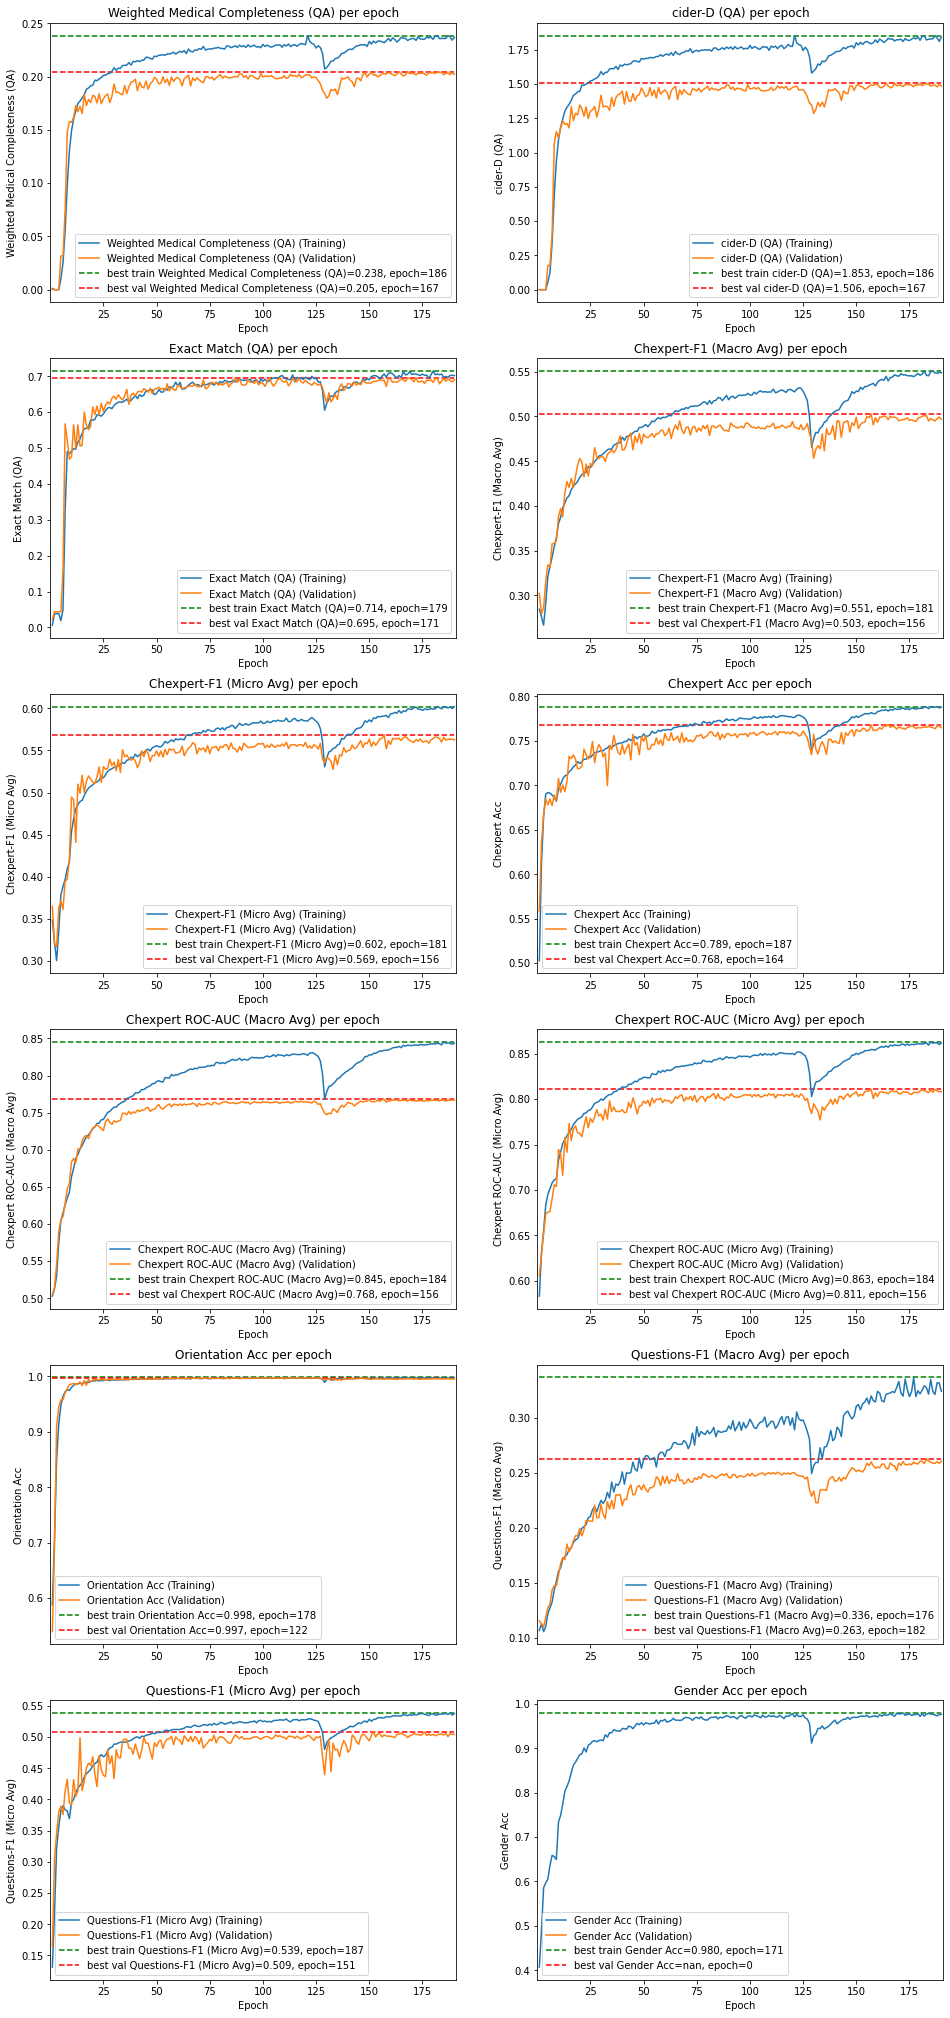

In [19]:
plot_train_val_curves('/home/pamessina/medvqa-workspace/models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metrics_logs.csv',
                 [MetricNames.WMEDCOMP, MetricNames.CIDER_D, MetricNames.EXACTMATCH_ANSWER,
                  MetricNames.CHXLABELMACROAVGF1, MetricNames.CHXLABELMICROAVGF1,
                  MetricNames.CHXLABELACC,
                  MetricNames.CHXLABEL_ROCAUC_MACRO, MetricNames.CHXLABEL_ROCAUC_MICRO,
                  MetricNames.ORIENACC,
                  MetricNames.QLABELS_MACROAVGF1, MetricNames.QLABELS_MICROAVGF1,
                  MetricNames.GENDER_ACC,
                 ],
                 ['Weighted Medical Completeness (QA)', 'cider-D (QA)', 'Exact Match (QA)',
                  'Chexpert-F1 (Macro Avg)', 'Chexpert-F1 (Micro Avg)',
                  'Chexpert Acc',
                  'Chexpert ROC-AUC (Macro Avg)', 'Chexpert ROC-AUC (Micro Avg)',
                  'Orientation Acc',
                  'Questions-F1 (Macro Avg)', 'Questions-F1 (Micro Avg)',
                  'Gender Acc'
                 ],
                 single_plot_figsize=(8,6))

# Test Set Evaluation


# Report-level Results

In [20]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql" \
        --eval-mode "ground-truth" \
        --no-iuxray \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql
   eval_mode: ground-truth
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220629_042239.json;qa_adapted_reports__20220629_050643.json).pkl ...


	**** process 1 finished, elapsed time = 190.96818852424622
	**** process 2 finished, elapsed time = 190.96837496757507
	**** process 3 finished, elapsed time = 190.9684476852417
	**** process 4 finished, elapsed time = 191.02438235282898
	**** process 5 finished, elapsed time = 191.02449226379395
	**** process 6 finished, elapsed time = 191.02455735206604
Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 7 finished, elapsed time = 196.6691288948059
	**** process 8 finished, elapsed time = 196.66928243637085
	**** process 9 finished, elapsed time = 196.66936588287354
	**** process 10 finished, elapsed time = 196.66943979263306
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl


In [21]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql" \
        --eval-mode "chexpert-labels" \
        --no-iuxray \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql
   eval_mode: chexpert-labels
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220629_042239.json;qa_adapted_reports__20220629_050643.json).pkl .

	**** process 5 finished, elapsed time = 50.04181909561157
Generating LALR tables
	**** process 6 finished, elapsed time = 52.116430044174194
Generating LALR tables
	**** process 7 finished, elapsed time = 53.283544301986694
Generating LALR tables
	**** process 8 finished, elapsed time = 53.9350528717041
Generating LALR tables
Generating LALR tables
	**** process 9 finished, elapsed time = 54.862706422805786
	**** process 10 finished, elapsed time = 54.86284351348877
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl


### MIMIC-CXR metrics

In [22]:
from medvqa.evaluation.report_generation import get_report_level_metrics_dataframe

In [23]:
df = get_report_level_metrics_dataframe([
    '/home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl',
    '/home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl',
])

   ** Not cached key: ('/home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl', 1659641545.6338122)
   ** Not cached key: ('/home/pamessina/medvqa-workspace/results/vqa/20220803_121657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl', 1659641766.7323568)
Report level metrics updated and saved to /home/pamessina/medvqa-workspace/cache/report_level_metrics_cache.pkl


In [24]:
df[df.columns[:20]]

,metrics_path,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,/home/pamessina/medvqa-workspace/results/vqa/2...,0.320162,0.190779,0.109858,0.060681,0.175211,0.268177,0.234365,0.184131,0.164989,0.666952,0.666296,0.786403,0.721385,0.584994,0.665685,0.61302,0.851631,0.492958,0.524272
1,/home/pamessina/medvqa-workspace/results/vqa/2...,0.299154,0.166738,0.094097,0.049385,0.041752,0.198006,0.185787,0.086886,0.065933,0.479992,0.393196,0.800822,0.527429,0.362333,0.721917,0.43432,0.651851,0.452830,0.301139
